# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## start with image size of 75, increase epochs, update size recurrently


---
## Import libraries

In [1]:
!ls -l

total 4480
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 15 02:37 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  206189 Jan 15 03:09 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  195983 Jan 15 03:10 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  179449 Jan 14 21:28 7_resnext50_sz_100.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  201400 Jan 15 02:17 8_resnext50_more_epoch_sz300.ipynb
-rw-rw-r-- 1 ub

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 15 02:31 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 11 ubuntu ubuntu       4096 Jan 15 02:44 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [8]:
arch=resnext50
sz=75
bs=32
lr = 0.005

In [9]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.1), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

### Learning Rate Finder

In [11]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 61%|██████    | 25/41 [00:00<00:00, 26.01it/s, loss=6.04] 


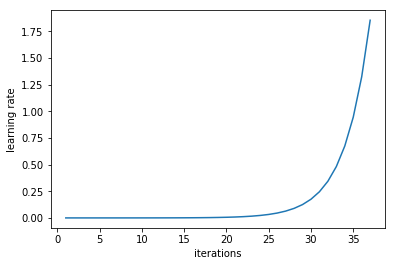

In [12]:
learn.sched.plot_lr()

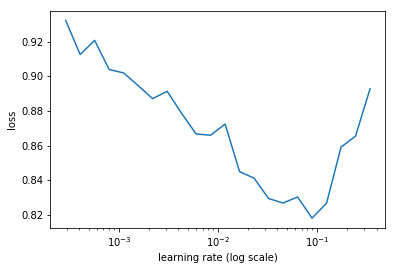

In [13]:
learn.sched.plot() 

In [14]:
learn.fit(lr, 4)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

[0.      0.63138 0.41214 0.82386]                          
[1.      0.51887 0.41855 0.82386]                          
[2.      0.46558 0.38888 0.81534]                          
[3.      0.41523 0.36854 0.83807]                          



### Stochastic Gradient Descent with Restart

In [15]:
lr = 0.005

In [16]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[0.      0.47263 0.40438 0.82386]                          
[1.      0.48643 0.45455 0.79829]                          
[2.      0.47378 0.43406 0.79829]                          
[3.      0.45293 0.46328 0.78409]                          
[4.      0.45911 0.41771 0.80682]                          
[5.      0.45683 0.41898 0.80114]                          
[6.      0.47629 0.46612 0.77273]                          
[7.      0.45904 0.4479  0.78693]                          
[8.      0.45114 0.46146 0.78977]                          
[9.      0.45089 0.41701 0.80966]                          
[10.       0.43859  0.44683  0.78977]                      
[11.       0.44912  0.47413  0.76989]                      
[12.       0.45419  0.41658  0.81534]                      
[13.       0.44119  0.43227  0.78977]                      
[14.       0.42665  0.4178   0.80398]                      



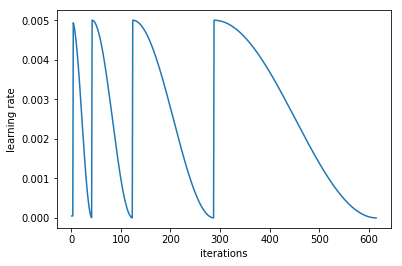

In [17]:
learn.sched.plot_lr()

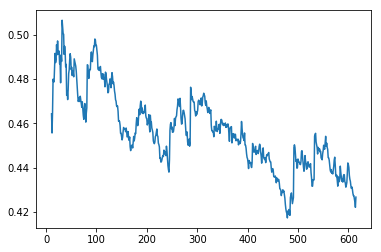

In [18]:
learn.sched.plot_loss()

In [19]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.33578669280276163, 0.8535825545171339)

In [20]:
# lr/10

In [21]:
# lr/9

In [22]:
# lr/3

In [23]:
# lr/4

### Unfreeze Layers

In [24]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [25]:
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[0.      0.52895 0.43363 0.76704]                          
[1.      0.57652 0.83397 0.67898]                          
[2.      0.55143 0.54828 0.71875]                          
[3.      0.54134 0.55685 0.72159]                          
[4.      0.53487 0.70877 0.66761]                          
[5.      0.51028 0.60451 0.71591]                          
[6.      0.47511 0.57754 0.72159]                          
[7.      0.46018 0.57151 0.74716]                          
[8.      0.44975 0.53455 0.73864]                          
[9.      0.40513 0.58791 0.75852]                          
[10.       0.4027   0.39094  0.80398]                      
[11.       0.39256  0.5075   0.76989]                      
[12.       0.40043  0.63183  0.75568]                      
[13.       0.39655  0.60965  0.74432]                      
[14.       0.38199  0.54091  0.76421]                      



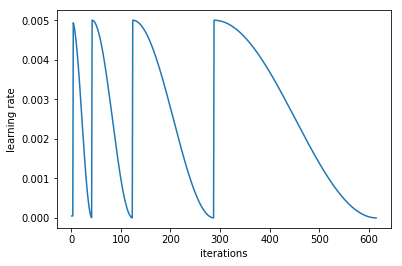

In [26]:
learn.sched.plot_lr()

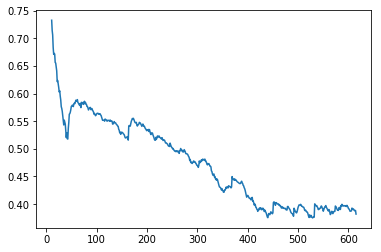

In [27]:
learn.sched.plot_loss()

In [28]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.31631838684071817, 0.8566978193146417)

## Resize the images

In [29]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 128

In [30]:
#train for image size 128x128
learn.set_data(get_data(128, 32))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.49605 0.65958 0.70739]                          
[1.      0.46542 0.52598 0.75284]                          
[2.      0.44293 0.5861  0.72727]                          
[3.      0.45917 0.60571 0.75   ]                          
[4.      0.43357 0.64696 0.73864]                          
[5.      0.42764 0.50874 0.77557]                          
[6.      0.43883 0.60276 0.75284]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.49493 0.56827 0.75   ]                          
[1.      0.46762 0.46115 0.78977]                          
[2.      0.40981 0.32787 0.85511]                          
[3.      0.38288 0.60412 0.74148]                          
[4.      0.36891 0.47053 0.80682]                          
[5.      0.47758 0.55048 0.70454]                          
[6.      0.44143 0.49864 0.71591]                          



In [31]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.38952553889756253, 0.8161993769470405)

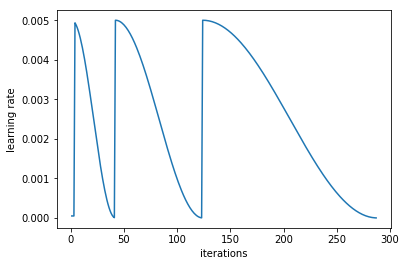

In [32]:
learn.sched.plot_lr()

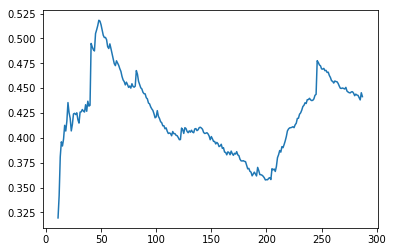

In [33]:
learn.sched.plot_loss()

## Image Size of 256

In [35]:
#train for image size 256x256
learn.set_data(get_data(200, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/81 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot_loss()

In [ ]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

## Save learner

In [ ]:
#learn.save('resnext50_sz75_sequ')

In [ ]:
#learn.load('resnext50_sz75_sequ')

## Output predictions to csv file

In [ ]:
#helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ.csv')

# END FILE

### Run Learner again

In [ ]:
# learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
# learn.sched.plot_loss()

In [ ]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [ ]:
# learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
# learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [ ]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [ ]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )